# Set Up

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('advertising.csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# TV: số tiền tiêu vào quảng cáo trên TV (đơn vị: nghìn đô)
# Radio: số tiền tiêu vào quảng cáo trên Đài (đơn vị: nghìn đô)
# Newspaper: số tiền tiêu vào quảng cáo trên báo giấy (nghìn đô)
# Sales: doanh số (số sản phẩm bán được - đơn vị: nghìn sản phẩm)

In [ ]:
# dự đoán doanh số (Sales) dựa trên số tiền tiêu vào quảng cáo ở mỗi kênh

# EDA (Phân tích dữ liệu)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Từng biến lẻ

<Axes: xlabel='Sales', ylabel='Count'>

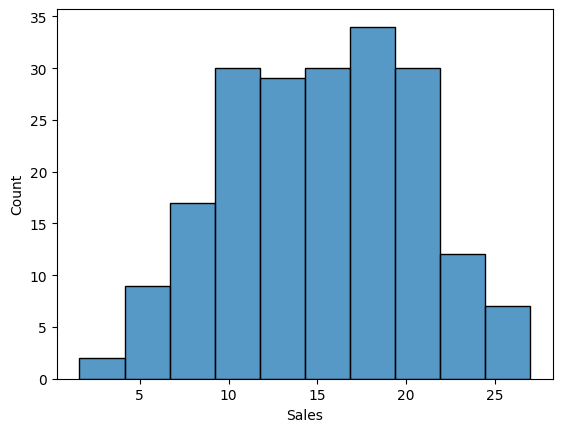

In [ ]:
# Phân bổ của Sales
sns.histplot(df['Sales'])

<Axes: xlabel='TV', ylabel='Count'>

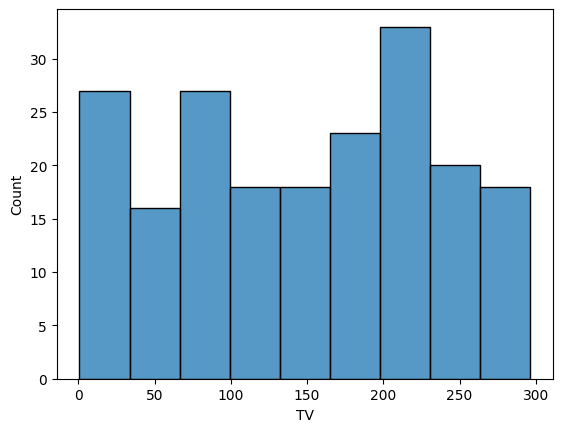

In [ ]:
# Phân bổ của số tiền tiêu vào quảng cáo trên TV
sns.histplot(df['TV'])

<Axes: xlabel='Radio', ylabel='Count'>

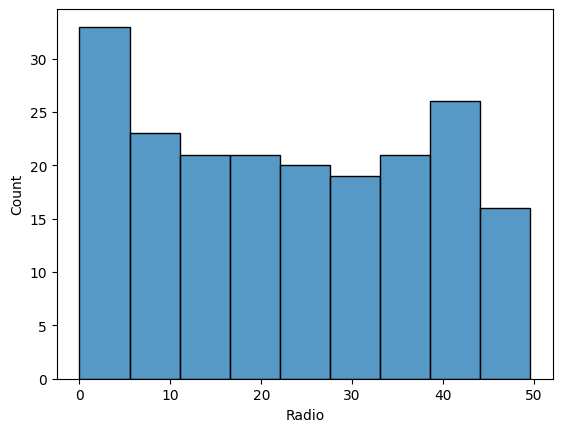

In [ ]:
# Radio
sns.histplot(df['Radio'])

<Axes: xlabel='Newspaper', ylabel='Count'>

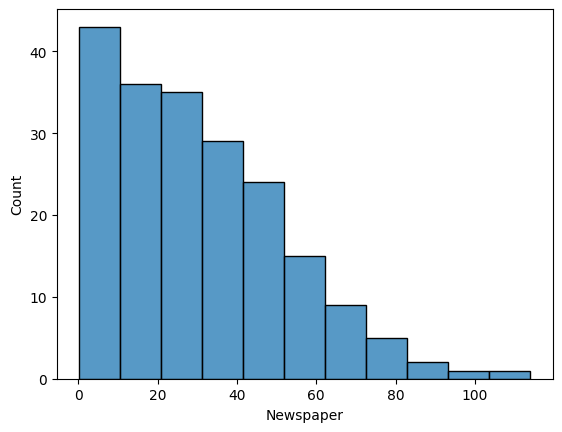

In [ ]:
# Newspaper
sns.histplot(df['Newspaper'])

## Mối quan hệ giữa các biến

In [ ]:
# Dự đoán Sales dựa trên số tiền quảng cáo ở từng kênh

### Mối quan hệ giữa biến phụ thuộc (Sales) và các biến độc lập

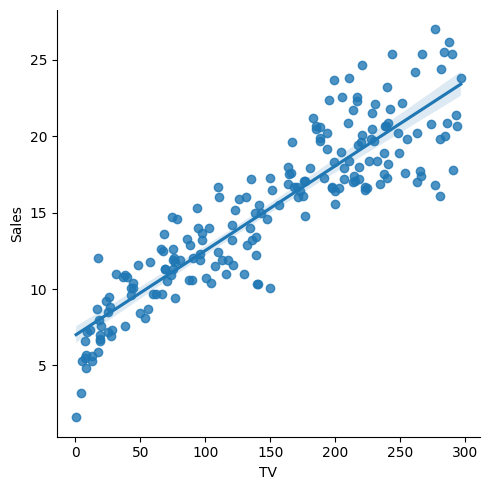

In [ ]:
# mối quan hệ giữa Sales và TV
sns.lmplot(x='TV', y='Sales', data=df)

In [ ]:
# Decision Tree,
# Random Forest,
# Gradient Boosting, ...

In [ ]:
# Linear Regression
# nâng cao hơn
# đánh giá kết quả của từng mô hình

In [ ]:
# mô hình dự đoán Sales dựa trên số tiền tiêu vào quảng cáo trên TV
# Sales = TV*a + b
# Tìm a, b sao cho Sales dự đoán gần với Sales thực tế nhất
# Tìm a, b sao cho Sai số nhỏ nhất có thể
  # Tìm a, b: Mô hình học máy (Machine Learning, AI):
    # Chạy mô hình (Linear Regression)

  # Sai số nhỏ nhất: Mean Absolute Error (MAE, RMSE, MSE):
    # Đánh giá kết quả mô hình đã chạy

<Axes: xlabel='Radio', ylabel='Sales'>

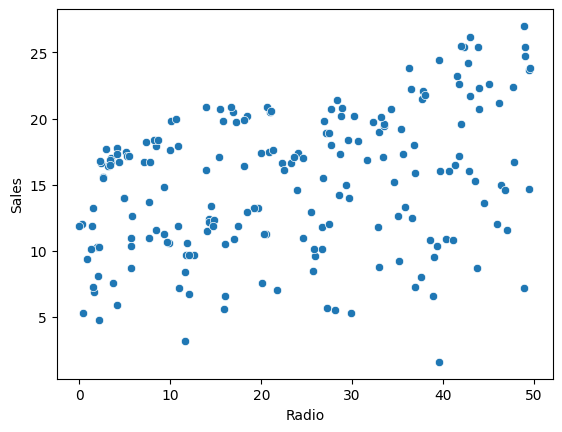

In [ ]:
# mối quan hệ giữa Sales và Radio
sns.scatterplot(x='Radio', y='Sales', data=df)

<Axes: xlabel='Newspaper', ylabel='Sales'>

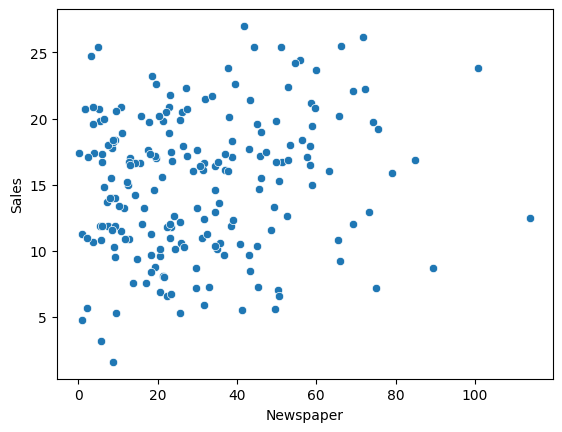

In [ ]:
# mối quan hệ giữa Sales và Newspaper
sns.scatterplot(x='Newspaper', y='Sales', data=df)

### Mối quan hệ giữa các biến độc lập

<Axes: >

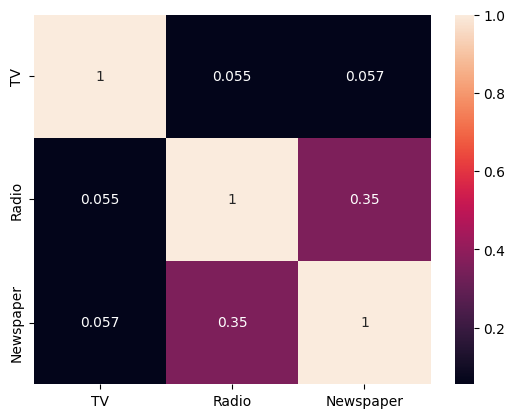

In [ ]:
# tránh multicollinearity
sns.heatmap(df[['TV', 'Radio', 'Newspaper']].corr(), annot=True)

# Mô hình dự đoán (Linear Regression)

In [ ]:
# Bắt đầu với mô hình đơn giản nhất
# Simple Linear Regression:
# Bắt đầu với 1 biến: TV

In [ ]:
# scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Chỉ định biến

In [ ]:
# Biến độc lập
X = df[['TV']]

# Biến phụ thuộc
y = df['Sales']

## Tách dữ liệu

In [ ]:
# Sau khi chạy mô hình, phải kiểm tra đánh giá kết quả của mô hình
# Tách dữ liệu
  # Train (70-80%): huấn luyện mô hình
    # dạy cho máy học quy luật giữa X và y (=> học máy)
  # Test (20-30%): kiểm tra/đánh giá kết quả mô hình

In [ ]:
# quy luật
  # quy luật đúng (real effect): ở đâu cũng đúng
  # quy luật ngẫu nhiên (random effect):
    # chỉ đúng một cách tình cờ ở tập dữ liệu này thôi

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
len(X_train)

160

In [ ]:
len(X_test)

40

## Xây mô hình

In [ ]:
# Gọi mô hình Linear Regression
lr = LinearRegression()

In [ ]:
# Áp mô hình này lên tập train
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Đọc hiểu kết quả
# a: weight/coefficient - trọng số
# b: bias/intercept - biến số

In [ ]:
coef = lr.coef_
intercept = lr.intercept_

In [ ]:
coef

array([0.05623465])

In [ ]:
intercept

6.802410257810793

In [ ]:
# Sales = TV*coef + intercept
# Giả sử công ty tiêu 20 (nghìn đô) vào quảng cáo trên TV,
# doanh số ước tính sẽ bằng bao nhiêu?

In [ ]:
sales = 20*coef + intercept
sales

array([7.92710335])

In [ ]:
# nếu công ty tiêu 20 (nghìn đô) vào quảng cáo trên TV, thì
# doanh số dự đoán sẽ được khoảng 7.927 (nghìn sản phẩm)

## Đánh giá kết quả mô hình

In [ ]:
# Đánh giá ở tập Test

In [ ]:
# Dự đoán trên tập test
y_pred = lr.predict(X_test)

In [ ]:
y_pred # kết quả Tiên đoán
# so y_pred (y Tiên đoán) với y_test (y thật)

array([11.00313896, 21.16474106, 13.15130277, 12.97697534,  8.57380188,
        7.89336256, 21.57525404, 18.80288557, 14.69213231, 19.20215161,
        8.93932714, 16.68283909, 19.30899746, 17.98748307, 17.69506287,
        9.31609932, 21.58650097, 12.18406671,  9.61414299, 19.62391152,
        7.90460949, 16.4354066 , 22.37378614, 21.49652553, 10.68260143,
       18.03809426, 23.31290487, 10.15399568, 16.11486907,  7.76964632,
        8.14079504, 19.16278736, 14.35472438,  7.5447077 , 16.75594414,
       12.26841869, 11.70607215, 12.09971473,  7.46035572, 15.60875718])

In [ ]:
# Mean Absolute Error (phổ biến nhất)

# Mean Square Error

# Root Mean Square Error (căn bậc 2 của MSE
# => đưa MSE về cùng đơn vị với cái mình muốn dự đoán)

In [ ]:
# Mean Absolute Error
mean_absolute_error(y_test, y_pred)
# Trung bình doanh số dự đoán đang lệch so với doanh số thật khoảng 1770 sản phẩm

1.7706783806719155

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.2779199338051805

In [ ]:
df['Sales'].describe()

count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

In [ ]:
# trung bình: 15000 sản phẩm
# lệch: 1700 sản phẩm

In [ ]:
# mô hình này có hiệu quả nhất định
# có thể cải thiện được

# Cải thiện mô hình

In [ ]:
# Dùng TV, Radio, Newspaper
X = df[['TV', 'Newspaper']]
y = df['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.6589046678359984
Mean Squared Error: 4.48090082528248
Root Mean Squared Error: 2.116813838126178


In [ ]:
# p-value